# Supermarket Analysis
Analysis of the DOODL Supermarket


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import pickle

# Read in Data
Orginates from .csv files where each day is a seperate csv

In [2]:
df_1 = pd.read_csv("data/monday.csv", sep=";")
df_2 = pd.read_csv("data/tuesday.csv", sep=";")
df_3 = pd.read_csv("data/wednesday.csv", sep=";")
df_4 = pd.read_csv("data/thursday.csv", sep=";")
df_5 = pd.read_csv("data/friday.csv", sep=";")
df = pd.concat([df_1, df_2, df_3, df_4, df_5])

In [3]:
df.shape

(24877, 3)

In [4]:
df.columns

Index(['timestamp', 'customer_no', 'location'], dtype='object')

In [5]:
df.location.unique()

array(['dairy', 'spices', 'fruit', 'checkout', 'drinks'], dtype=object)

# Transformation
## Convert the timestamp and create features

In [6]:

df["timestamp"] = pd.to_datetime(df["timestamp"])
df["month"] = df["timestamp"].dt.month
df["weekday"] = df["timestamp"].dt.weekday
df["hour"] = df["timestamp"].dt.hour
df["date"] = df["timestamp"].dt.date
df["time"] = df["timestamp"].dt.time
df.set_index("timestamp",inplace=True)

df['customer_no_unique']=df.duplicated('customer_no')
df['customerexit']=df.location=='checkout'
df['customerinmarket']=df.customerexit!=True


In [7]:
df.resample('D').customer_no.describe().round(1)

count   mean    std  min    25%    50%     75%     max
timestamp                                                          
2019-09-02  4884.0  718.3  411.8  1.0  366.0  720.0  1070.0  1447.0
2019-09-03  4714.0  706.1  414.2  1.0  338.2  710.0  1067.8  1422.0
2019-09-04  5050.0  765.6  441.2  1.0  381.2  764.5  1154.0  1531.0
2019-09-05  5104.0  777.4  437.9  1.0  400.8  784.0  1154.0  1535.0
2019-09-06  5125.0  754.4  435.5  1.0  372.0  756.0  1123.0  1510.0

In [8]:
df.isnull().sum()

customer_no           0
location              0
month                 0
weekday               0
hour                  0
date                  0
time                  0
customer_no_unique    0
customerexit          0
customerinmarket      0
dtype: int64

# Data Exploration
Examination of specific customer behavior.

In [38]:
df.groupby('location')['customer_no_unique'].sum()

location
checkout    7417.0
dairy       4245.0
drinks      3650.0
fruit       4573.0
spices      3457.0
Name: customer_no_unique, dtype: float64

(200, 335)

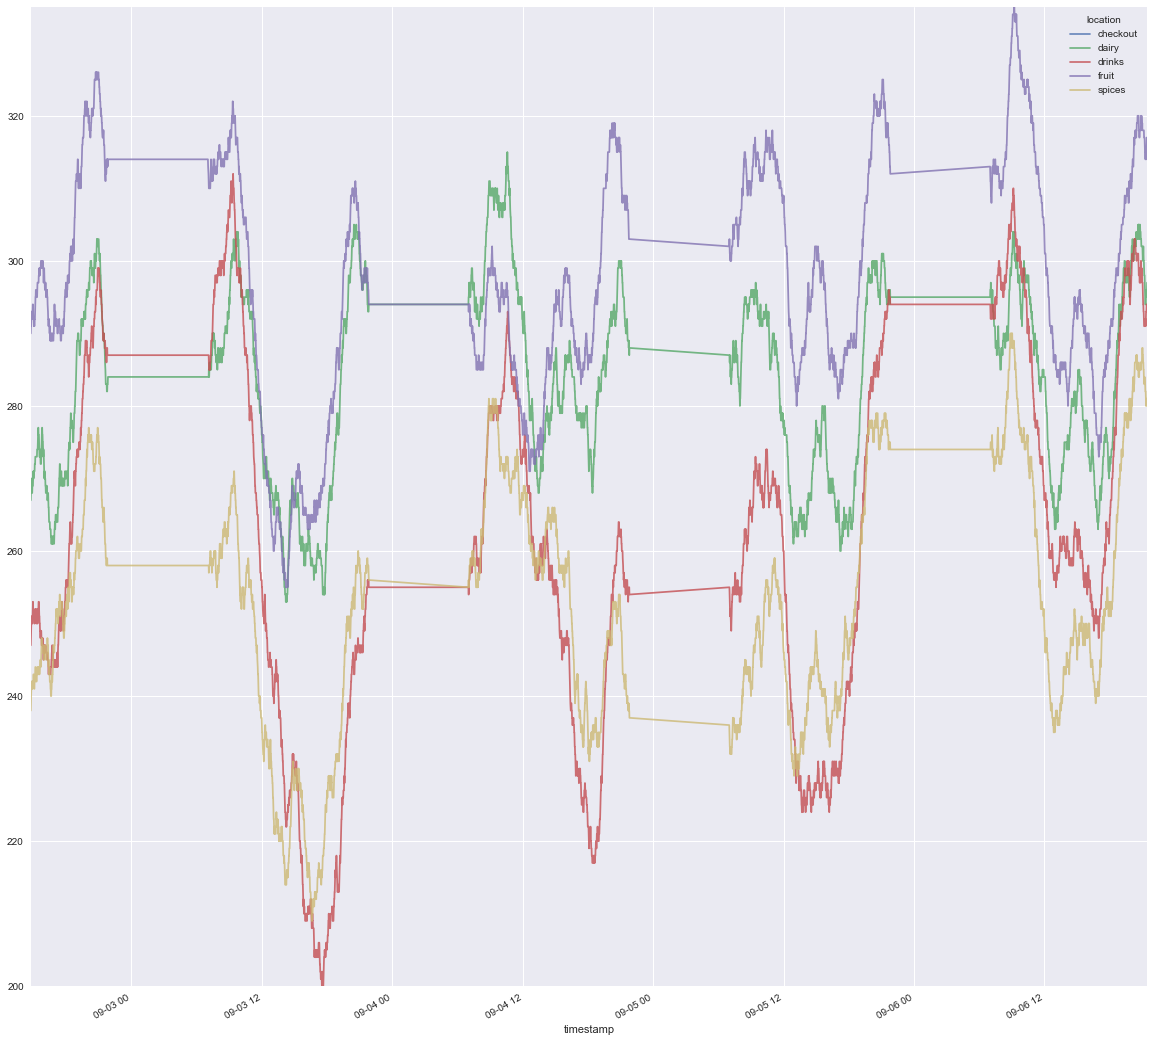

In [10]:
# df.loc['2019-09-06 21:26:00','location'].value_counts()  # Probe

ax=df.reset_index().groupby(['timestamp'])['location'].value_counts().unstack(1).rolling(460).count().plot(figsize=(20, 20),alpha=0.8)
ax.set_xlim('2019-09-02 14:45:00','2019-09-06 21:26:00')
ax.set_ylim(200,335)

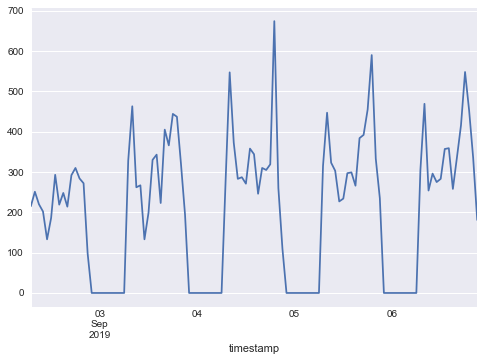

In [40]:
df['customer_no_unique'].resample('h').sum().rolling(1).sum().plot()

In [31]:
timespan=df.reset_index().groupby(['customer_no'])['timestamp'].agg([min , max])
timedelta=timespan[min]-timespan[max]
timedelta

customer_no
1      4 days 00:02:00
2      3 days 23:58:00
3      4 days 00:07:00
4      3 days 23:58:00
5      4 days 00:11:00
             ...      
1531   1 days 00:00:00
1532   0 days 00:00:00
1533   0 days 00:00:00
1534   0 days 00:01:00
1535   0 days 00:01:00
Length: 1535, dtype: timedelta64[ns]

In [12]:
# Calculate the time each customer spent in the market
# Calculate the total number of customers present in the supermarket over time.
# Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).
# Estimate the total revenue for a customer value using the following table:


In [13]:
#  df.reset_index().groupby(["date", "customer_no"])["timestamp"].max().unstack().fillna(0)

In [14]:
# df_timespend[0].value_counts().sort_index().plot.bar(figsize=(15, 10))
# plt.xlabel("Time Spent")
# plt.ylabel("count")
# title = "Count of the amount of time spent at the supermarket from Monday to Friday"
# plt.title(title)

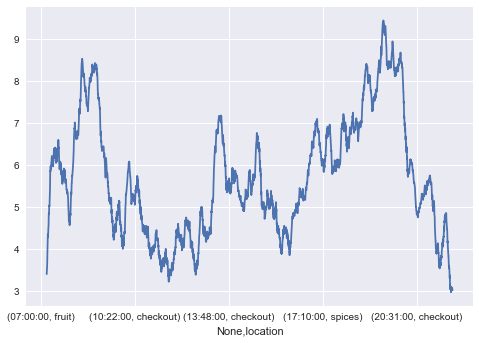

In [15]:
# Calculate the total number of customers in each section over time
# df.loc['2019-09-06 21:26:00','location'].value_counts()  # Probe
df.reset_index().groupby(['timestamp'])['location'].value_counts()

df.groupby(df.index.time)['location'].value_counts().rolling(60).mean().plot()


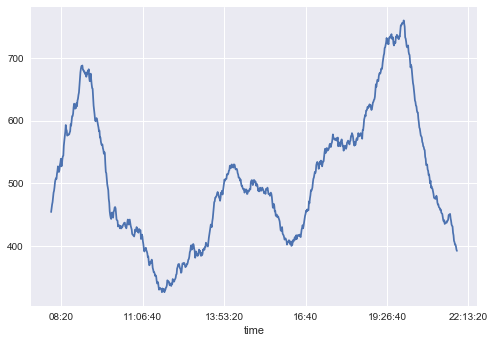

In [16]:
# Display the number of customers at checkout over time
# df.loc['2019-09-05 21:46:00','customerexit'].sum()  #Probe
df.groupby(df.index.time)['customerexit'].sum().rolling(60).sum().plot()
# df['customerexit'].resample('h').sum().rolling(1).mean().plot()



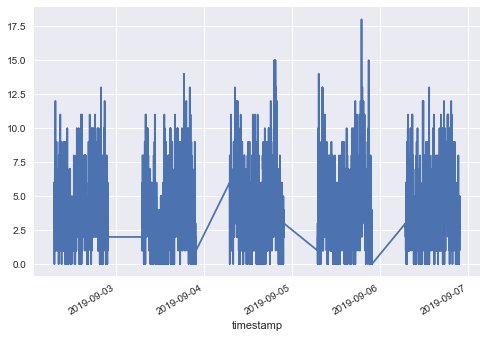

In [18]:
# Calculate the total number of customers present in the supermarket over time.
# df.loc[:,'customerinmarket'].sum()  #probe
df.reset_index().groupby(['timestamp'])['customerinmarket'].sum().plot()
# df['customerinmarket'].resample('h').sum().rolling(1).sum().plot()

In [19]:
df['time_spent_section'] = df.reset_index().groupby('customer_no')['timestamp'].shift(-1) - df.reset_index()['timestamp']

In [20]:
revenueminute={'fruit':4,'spices':3,'dairy':5,'drinks':6}
df['section_rev'] = df.location.map(revenueminute)


In [21]:
df.sort_values(by=["customer_no_unique", "timestamp"]).groupby( "customer_no_unique")['location'].shift(-1)

timestamp
2019-09-02 07:03:00       dairy
2019-09-02 07:03:00       dairy
2019-09-02 07:04:00       dairy
2019-09-02 07:04:00      spices
2019-09-02 07:04:00      spices
                         ...   
2019-09-06 21:50:00    checkout
2019-09-06 21:50:00    checkout
2019-09-06 21:50:00      drinks
2019-09-06 21:50:00      spices
2019-09-06 21:50:00         NaN
Name: location, Length: 24877, dtype: object

In [22]:
df['location']=df.reset_index().sort_values(by=["customer_no", "timestamp"]).groupby( "customer_no_unique")['location'].shift(-1)

In [23]:
pd.crosstab(df['location'],df['next_loc'],normalize=0)

KeyError: 'next_loc'

In [ ]:
pd.crosstab(df['location'],df['next_loc'],normalize=0)

In [ ]:
pickle.dump(P, open( "TrasitionMatrix.p", "wb" ) )

In [ ]:
# give different options, show effort

In [ ]:
# grab it, store it, clean it, analyze it, visualize it, interpret it